## Identifying Duplicate Questions

Over 100 million people visit Quora every month, so it's no surprise that many people ask similar (or the same) questions. Various questions with the same intent can cause people to spend extra time searching for the best answer to their question, and results in members answering multiple versions of the same question. Quora uses random forest to identify duplicated questions to provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
Follow the steps outlined below to build the appropriate classifier model. 


Steps:
- Download data
- Exploration
- Cleaning
- Feature Engineering
- Modeling

By the end of this project you should have **a presentation that describes the model you built** and its **performance**. 


In [125]:
import pandas as pd

In [126]:
df = pd.read_csv("train.csv")

#### Note
There is no designated test.csv file. The train.csv file is the entire dataset. Part of the data in the train.csv file should be set aside to act as the final testing data.

In [127]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
df, test_df = train_test_split(df, test_size=0.2, random_state=42)

### Exploration

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
352886,352886,214777,481858,What are some of the short stories?,What are some great short stories with a twist...,0
134949,134949,178460,215604,Is this a German Shepherd dog?,Are german shepherd dogs loyal?,0
168419,168419,74366,106454,What is the most important lesson ever learned...,What are the most important lessons you have l...,1
402543,402543,257727,111990,Which ad networks for mobile native ads have a...,Which ad networks for desktop native ads have ...,1
13551,13551,26006,26007,What should I do to be an athlete in a month?,What is shop act licence?,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323432 entries, 352886 to 121958
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            323432 non-null  int64 
 1   qid1          323432 non-null  int64 
 2   qid2          323432 non-null  int64 
 3   question1     323431 non-null  object
 4   question2     323430 non-null  object
 5   is_duplicate  323432 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 17.3+ MB


In [6]:
df[df.isnull().any(axis=1)]

,id,qid1,qid2,question1,question2,is_duplicate
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0
105780,105780,174363,174364,How can I develop android app?,NaN,0


In [7]:
df = df.fillna('no que')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323432 entries, 352886 to 121958
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            323432 non-null  int64 
 1   qid1          323432 non-null  int64 
 2   qid2          323432 non-null  int64 
 3   question1     323432 non-null  object
 4   question2     323432 non-null  object
 5   is_duplicate  323432 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 17.3+ MB


### Cleaning

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Normalizing
- Stemming

In [22]:
feature = df[['question1','question2']]

In [23]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323432 entries, 352886 to 121958
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   question1  323432 non-null  object
 1   question2  323432 non-null  object
dtypes: object(2)
memory usage: 7.4+ MB


In [71]:
# Define a function to remove punctuation in our messages
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

In [72]:
def convert_to_lowercase(text):
    return text.lower()

In [73]:
# Import the NLTK package and download the necessary data
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Define a function to remove all stopwords
def remove_stopwords(tokenized_text):
    ENGstopwords = stopwords.words('english')
    text = [word for word in tokenized_text if word not in ENGstopwords]
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
#import regular expression
import re

def tokenize(text):
    tokens = text.split()
    return tokens

In [75]:
# importing modules 
nltk.download('punkt')
from nltk.stem import PorterStemmer

def stem_text(tokenized_text):
    stemmer = PorterStemmer()
    stemmed_words = []
    for word in tokenized_text:
        stemmed_word = stemmer.stem(word)
        stemmed_words.append(stemmed_word)
    return ' '.join(stemmed_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
df['question1']

352886                  What are some of the short stories?
134949                       Is this a German Shepherd dog?
168419    What is the most important lesson ever learned...
402543    Which ad networks for mobile native ads have a...
13551         What should I do to be an athlete in a month?
                                ...                        
259178                     How do you feed a Venus flytrap?
365838    I'm an Electrical Engineering student of Sixth...
131932    What is the best DSLR camera for a beginner to...
146867      What is a good computer desk for dual monitors?
121958    Focusing & Concentrating: How do I keep myself...
Name: question1, Length: 323432, dtype: object

In [76]:
import string
def preprocess(text):
    text = str(text)  # Convert text to string
    text = remove_punct(text)
    text = convert_to_lowercase(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = stem_text(text)
    return text

In [47]:
df['question1_clean'] = df['question1'].apply(lambda x: preprocess(x))

In [48]:
df['question1_clean']

352886                                          short stori
134949                                  german shepherd dog
168419                        import lesson ever learn life
402543    ad network mobil nativ ad good fill rateecpm b...
13551                                          athlet month
                                ...                        
259178                                    feed venu flytrap
365838    im electr engin student sixth semest made fina...
131932                    best dslr camera beginn buy india
146867                        good comput desk dual monitor
121958                 focus concentr keep awak bore lectur
Name: question1_clean, Length: 323432, dtype: object

In [49]:
df['question2_clean'] = df['question2'].apply(lambda x: preprocess(x))

In [50]:
df.head()

,question1,question2,is_duplicate,question1_str,question1_clean,question2_clean
352886,What are some of the short stories?,What are some great short stories with a twist...,0,What are some of the short stories?,short stori,great short stori twist end
134949,Is this a German Shepherd dog?,Are german shepherd dogs loyal?,0,Is this a German Shepherd dog?,german shepherd dog,german shepherd dog loyal
168419,What is the most important lesson ever learned...,What are the most important lessons you have l...,1,What is the most important lesson ever learned...,import lesson ever learn life,import lesson learn life learn
402543,Which ad networks for mobile native ads have a...,Which ad networks for desktop native ads have ...,1,Which ad networks for mobile native ads have a...,ad network mobil nativ ad good fill rateecpm b...,ad network desktop nativ ad good fill rateecpm...
13551,What should I do to be an athlete in a month?,What is shop act licence?,0,What should I do to be an athlete in a month?,athlet month,shop act licenc


In [51]:
# Save the DataFrame as a CSV file
#df.to_csv('clean_df.csv', index=False)

### Feature Engineering

- tf-idf
- word2vec
- word count
- number of the same words in both questions
- ....

In [1]:
import pandas as pd
df = pd.read_csv('clean_df.csv')

In [4]:
df.head()

,question1,question2,is_duplicate,question1_str,question1_clean,question2_clean
0,What are some of the short stories?,What are some great short stories with a twist...,0,What are some of the short stories?,short stori,great short stori twist end
1,Is this a German Shepherd dog?,Are german shepherd dogs loyal?,0,Is this a German Shepherd dog?,german shepherd dog,german shepherd dog loyal
2,What is the most important lesson ever learned...,What are the most important lessons you have l...,1,What is the most important lesson ever learned...,import lesson ever learn life,import lesson learn life learn
3,Which ad networks for mobile native ads have a...,Which ad networks for desktop native ads have ...,1,Which ad networks for mobile native ads have a...,ad network mobil nativ ad good fill rateecpm b...,ad network desktop nativ ad good fill rateecpm...
4,What should I do to be an athlete in a month?,What is shop act licence?,0,What should I do to be an athlete in a month?,athlet month,shop act licenc


# word2vec

In [55]:
import gensim

# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format("C:/Users/patel/GoogleNews-vectors-negative300.bin.gz", binary=True)

In [61]:
import numpy as np
def string_similarity(string1, string2):
    # Tokenize the strings into words
    tokens1 = string1.lower().split()
    tokens2 = string2.lower().split()

    # Remove out-of-vocabulary words and get corresponding vectors
    vectors1 = [model.get_vector(word) for word in tokens1 if word in model.key_to_index]
    vectors2 = [model.get_vector(word) for word in tokens2 if word in model.key_to_index]

    if not vectors1 or not vectors2:
        # Return similarity of 0 if either of the strings is empty or contains only out-of-vocabulary words
        return 0.0

    # Pad vectors with zeros to have the same length
    max_length = max(len(vectors1), len(vectors2))
    vectors1 = pad_vectors(vectors1, max_length)
    vectors2 = pad_vectors(vectors2, max_length)

    # Calculate the similarity between the vectors
    similarity = np.dot(vectors1, vectors2.T).mean()

    return similarity

def pad_vectors(vectors, length):
    padded_vectors = np.zeros((length, model.vector_size))
    padded_vectors[:len(vectors)] = vectors
    return padded_vectors

# Example usage
string1 = "I am happy"
string2 = "I am glad"
similarity = string_similarity(string1, string2)
print("Similarity:", similarity)

Similarity: 3.0903111566417985


In [68]:
string_similarity(df['question1_clean'][1],df['question2_clean'][1])

2.7502065199737444

In [70]:
df['similarity'] = df.apply(lambda row: string_similarity(str(row['question1_clean']), str(row['question2_clean'])), axis=1)

In [72]:
#df.to_csv('simillarity_df.csv', index=False)

In [3]:
df = pd.read_csv('simillarity_df.csv')

In [4]:
# Fill missing values with empty strings
df['question1_clean'].fillna('', inplace=True)
df['question2_clean'].fillna('', inplace=True)


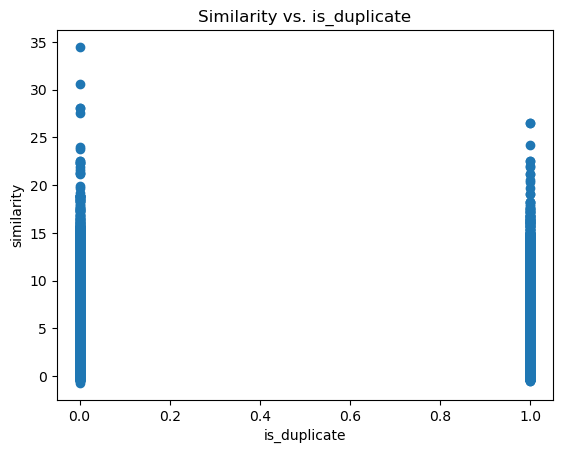

In [4]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(df['is_duplicate'], df['similarity'])
plt.xlabel('is_duplicate')
plt.ylabel('similarity')
plt.title('Similarity vs. is_duplicate')
plt.show()

# word count

In [5]:
df['question1_word_count'] = df['question1_clean'].apply(lambda x: len(str(x).split()))

In [6]:
df['question2_word_count'] = df['question2_clean'].apply(lambda x: len(str(x).split()))

In [7]:
df['diff_word_count'] = df['question1_word_count'] - df['question2_word_count']

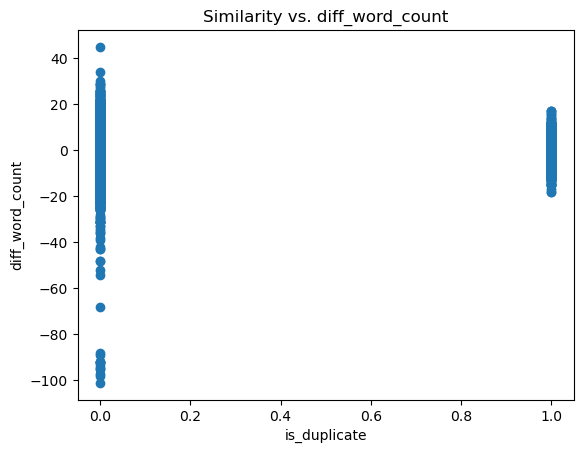

In [8]:
# Scatter plot
plt.scatter(df['is_duplicate'], df['diff_word_count'])
plt.xlabel('is_duplicate')
plt.ylabel('diff_word_count')
plt.title('Similarity vs. diff_word_count')
plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer #for BoW
vect = CountVectorizer()

In [47]:
vectorizer.fit(df['question1_clean'].tolist() + df['question2_clean'].tolist())

# Create the document-term matrices with the same vocabulary
word_count_vector_que1 = vectorizer.transform(df['question1_clean'])
word_count_vector_que2 = vectorizer.transform(df['question2_clean'])

# number of the same words in both questions

In [9]:

import numpy as np

def count_same_words(row):
    words1 = set()
    words2 = set()
    if isinstance(row['question1_clean'], str):
        words1 = set(row['question1_clean'].lower().split())
    if isinstance(row['question2_clean'], str):
        words2 = set(row['question2_clean'].lower().split())
    return len(words1.intersection(words2))

df['num_of_same_words'] = df.apply(count_same_words, axis=1)

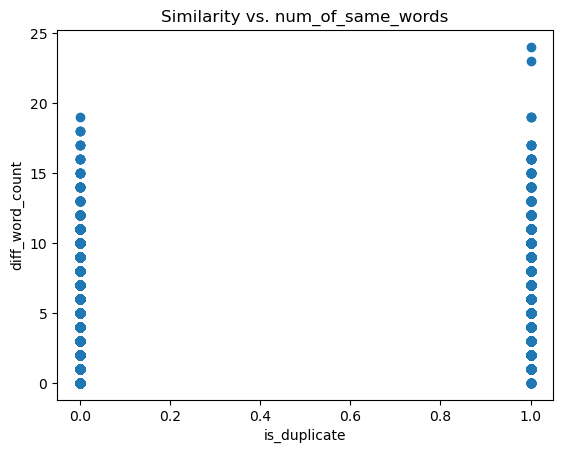

In [10]:
# Scatter plot
plt.scatter(df['is_duplicate'], df['num_of_same_words'])
plt.xlabel('is_duplicate')
plt.ylabel('diff_word_count')
plt.title('Similarity vs. num_of_same_words')
plt.show()

# TfIdf with TfidfTransformer

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TfidfVectorizer with a common vocabulary
vectorizer = TfidfVectorizer()
vectorizer.fit(df['question1_clean'].tolist() + df['question2_clean'].tolist())

# Create the document-term matrices with the same vocabulary
tfidf_matrix_que1 = vectorizer.transform(df['question1_clean'])
tfidf_matrix_que2 = vectorizer.transform(df['question2_clean'])

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Define the batch size
batch_size = 1

# Calculate the number of batches
num_batches = int(np.ceil(tfidf_matrix_que1.shape[0] / batch_size))

# Create an empty list to store the similarity scores
similarity_scores = []

# Process the matrices in batches
for batch in range(num_batches):
    # Define the start and end indices for the current batch
    start_idx = batch * batch_size
    end_idx = min((batch + 1) * batch_size, tfidf_matrix_que1.shape[0])

    # Select the batch from the matrices
    batch_que1 = tfidf_matrix_que1[start_idx:end_idx]
    batch_que2 = tfidf_matrix_que2[start_idx:end_idx]

    # Calculate cosine similarity for the current batch
    batch_similarity = cosine_similarity(batch_que1, batch_que2)

    # Append the batch similarity scores to the list
    similarity_scores.append(batch_similarity)

# Concatenate the similarity scores from all batches
similarity_scores = np.concatenate(similarity_scores)

# Add similarity scores to a new column in the DataFrame
df['similarity_score'] = similarity_scores.flatten()


In [9]:
df['similarity_score']

0         0.584673
1         0.805105
2         0.875596
3         0.921860
4         0.000000
            ...   
323427    0.836297
323428    0.648030
323429    0.515638
323430    0.882652
323431    0.806581
Name: similarity_score, Length: 323432, dtype: float64

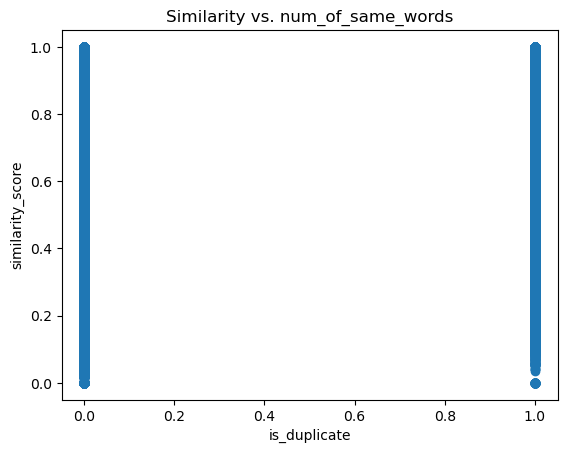

In [12]:
import matplotlib.pyplot as plt
# Scatter plot
plt.scatter(df['is_duplicate'], df['similarity_score'])
plt.xlabel('is_duplicate')
plt.ylabel('similarity_score')
plt.title('Similarity vs. num_of_same_words')
plt.show()

### Modeling

Different modeling techniques can be used:

- logistic regression
- XGBoost
- LSTMs
- etc

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# logistic regression

In [20]:
# Use logistic regression to predict if questions are duplicate or not
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = df['similarity'].values.reshape(-1, 1)
y = df['is_duplicate'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, y_pred)
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.6314715476061651
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.95      0.76     40786
           1       0.51      0.09      0.16     23901

    accuracy                           0.63     64687
   macro avg       0.57      0.52      0.46     64687
weighted avg       0.59      0.63      0.54     64687



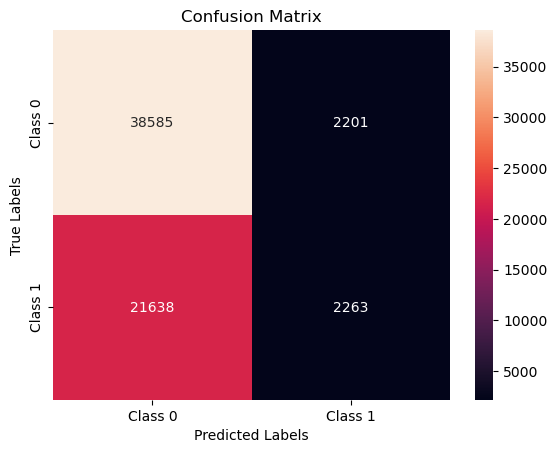

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels 
class_labels = ['Class 0', 'Class 1'] 

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

# XGBoost

In [100]:
import xgboost as xgb
# Train the XGBoost classifier
clf1 = xgb.XGBClassifier()
clf1.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.7387883191367662
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82     40786
           1       0.77      0.42      0.54     23901

    accuracy                           0.74     64687
   macro avg       0.75      0.67      0.68     64687
weighted avg       0.74      0.74      0.72     64687



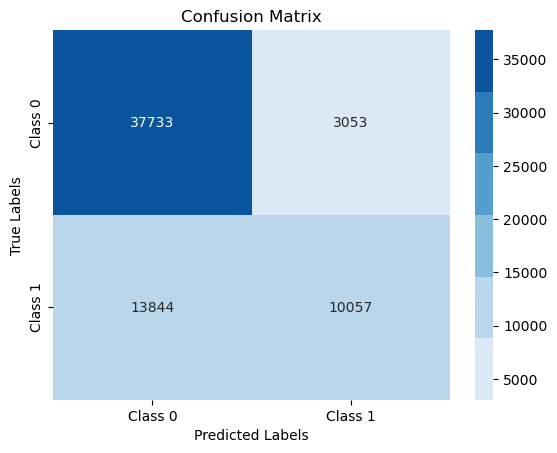

In [104]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels 
class_labels = ['Class 0', 'Class 1'] 

# Create a color map
cmap = sns.color_palette("Blues")

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels,cmap=cmap)

# Add labels and title to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

# LSTMs

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

# Pad sequences to a fixed length
max_sequence_length = 100  # Adjust this value as needed
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Step 5: Modeling
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

import numpy as np

# Convert the input data to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Build the LSTM model
embedding_dim = 100  # Adjust this value as needed
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
batch_size = 32  # Adjust this value as needed
epochs = 5  # Adjust this value as needed
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/5
8086/8086 [==============================] - 1879s 232ms/step - loss: 0.5142 - accuracy: 0.7476 - val_loss: 0.4814 - val_accuracy: 0.7684
Epoch 2/5
8086/8086 [==============================] - 1823s 225ms/step - loss: 0.4174 - accuracy: 0.8049 - val_loss: 0.4520 - val_accuracy: 0.7866
Epoch 3/5
8086/8086 [==============================] - 1767s 218ms/step - loss: 0.3386 - accuracy: 0.8470 - val_loss: 0.4528 - val_accuracy: 0.7929
Epoch 4/5
8086/8086 [==============================] - 1721s 213ms/step - loss: 0.2738 - accuracy: 0.8791 - val_loss: 0.4764 - val_accuracy: 0.7928
Epoch 5/5
2022/2022 [==============================] - 60s 30ms/step - loss: 0.5263 - accuracy: 0.7910
Loss: 0.5262574553489685
Accuracy: 0.7910090088844299


In [77]:
df = test_df.fillna('no que')

In [78]:
feature = df[['question1','question2']]

In [79]:
df['question1_clean'] = df['question1'].apply(lambda x: preprocess(x))

In [80]:
df['question2_clean'] = df['question2'].apply(lambda x: preprocess(x))

In [81]:
# Save the DataFrame as a CSV file
df.to_csv('clean_test_df.csv', index=False)

In [82]:
# Prepare the features and labels
corpus1 = df['question1_clean'].tolist()
corpus2 = df['question2_clean'].tolist()

# Combine the two question columns
corpus = [q1 + ' ' + q2 for q1, q2 in zip(corpus1, corpus2)]

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

# Pad sequences to a fixed length
max_sequence_length = 100  # Adjust this value as needed
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

X_test = np.array(padded_sequences)


In [83]:
# Make predictions
predictions = model.predict(X_test)

2527/2527 [==============================] - 57s 22ms/step


In [149]:
predictions

array([8.0218720e-01, 2.4241863e-02, 2.1733895e-04, ..., 1.1303309e-02,
       1.2724793e-04, 2.8691438e-01], dtype=float32)

In [151]:
threshold = 0.5  # Adjust this threshold as needed
y_pred_actual = (predictions >= threshold).astype(int)
len(y_pred_actual)

80858

In [152]:
y_test = np.array(test_df['is_duplicate'])

In [153]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

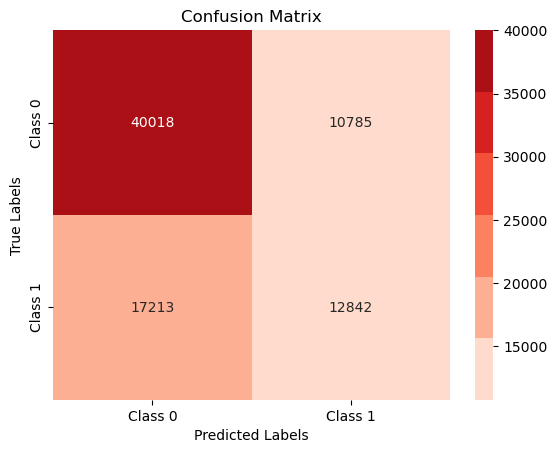

In [155]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_actual)

# Define class labels 
class_labels = ['Class 0', 'Class 1'] 

# Create a color map
cmap = sns.color_palette("Reds")

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels,cmap=cmap)

# Add labels and title to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()